## Stats507 Homework 7, March 13, 2019
### Israel Diego
#### israeldi@umich.edu

This notebook shows solutions to homework 7 for Stats507

## Table of Contents

1. [Problem 1: Regular Expressions: Warmup](#Problem-1:-Regular-Expressions:-Warmup)
2. [Problem 2: Exploring Internet Traffic with Regexes](#Problem-2:-Exploring-Internet-Traffic-with-Regexes)
3. [Problem 3: Retrieving Data from the Web](#Problem-3:-Retrieving-Data-from-the-Web)
4. [Problem 4: Retrieving Data from the Web](#Problem-4:-Relational-Databases-and-SQL)

### Problem 1: Regular Expressions: Warmup
#### Time Spent: 2 hours
#### ([Back to Top](#Table-of-Contents))
In this problem, you'll get practice with basic regular expressions. Pay particular attention to edge cases such as the empty string and single-character strings when writing your regexes. At the URL http://www.greenteapress.com/thinkpython/code/words.txt is a list of about $100,000$ English words.
1. Use `urllib` to open the URL and read the file, and produce a list of ASCII strings so that each line of the file corresponds to an element of the list. You will likely need to convert the raw bytes read from the webpage to ASCII characters, for which you should see the documentation for the string methods `encode` and `decode`. How many words are in the file?

In [61]:
import urllib.request
import re

response = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt')
words = []
for line in response:
    words.append(line.decode("ascii").replace('\r\n', ''))

numWords = len(words)
numWords

113809

2. It is a good habit to always look at your data to check that it makes sense. Have a look at the words in the list. Does anything jump out at you? **Note:** I am not requiring you to do anything specific, here. Just look at the data!

- *After removing unwanted characters, `\r\n`, each element in the list represents a word of type string*

3. Write a regular expression that matches any string containing exactly four consecutive consonants. Compile this regular expression, and assign it to a variable called `four_consecutive_consonants`. Use this regex to determine how many words from the list start with exactly four consecutive consonants. For the purposes of this **specific** problem, the vowels are `a, e, i, o, u, y`. All other letters are consonants. Produce a list of all such words.

In [62]:
four_consecutive_consonants = re.compile(r'[^aeiouy]{4}')
filterWords = list(filter(four_consecutive_consonants.search, words))

num_four_consonants = len(filterWords)
num_four_consonants

1629

4. Write a regular expression that matches any string that contains no instances of the letter `e`. Compile this regular expression, and assign it to a variable called `gadsby`. (*Gadsby* is the title of an English novel written in the $1930$s that contains *almost* no instances of the letter `e`). How many words in the list do not contain the letter `e`?

In [63]:
gadsby = re.compile(r'^[^e]*$')
filterWords = list(filter(gadsby.search, words))

numGadsby = len(filterWords)
numGadsby

37641

5. Write a regular expression that matches any string that begins and ends with a vowel and has no vowels in between. For the purposes of this specific problem, y is neither consonant nor vowel, so consonants are the $20$ letters that are not one of `a, e, i, o, u, y` and vowels are `a, e, i, o, u`. The words need not begin and end with the *same* vowel, so `angle` is a valid match. Compile this regular expression, and assign it to a variable called `vowel_vowel`. How many words begin and end with a vowel with no vowels in between?

In [64]:
vowel_vowel = re.compile(r'^[aeiou]{1}[^aeiouy]*[aeiou]{1}$')
filterWords = list(filter(vowel_vowel.search, words))

# vowel_vowel
num_vowel_vowel = len(filterWords)
num_vowel_vowel

169

6. Write a regular expression that matches any string whose last two characters are the first two characters in reverse order. So, for example, your regex should match `repeater` and `stats`, but not `neoprene`. Compile this regular expression and assign it to a variable called `bookends`. How many words in the list have this property? **Hint:** be careful of the cases in which the word is length less or equal to $3$. You may handle the case of a single character (e.g., `a`), as you like, but please give an explanation for your choice.

In [65]:
bookends = re.compile(r'^(\w)(\w).*\2\1$|^(\w).\3$|^(\w)\4$|^.$')
filterWords = list(filter(r.search, words))

numBookends = len(filterWords)
numBookends

886

* *I chose to include all single characters as part of the bookends list*

### Problem 2: Exploring Internet Traffic with Regexes
#### Time Spent: 2 hours
#### ([Back to Top](#Table-of-Contents))
In this problem, you'll get a taste of a more realistic application of regular expressions. The
file http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt contains data generated by web traffic associated with Skype and IRC, captured using the Wireshark program, a common tool for analyzing web traffic. The original data file can be found on the Wireshark wiki, https://wiki.wireshark.org/SampleCaptures, but please use the file provided on my website for this assignment.
1. Download the file from the URL above (or use `urllib` or `requests` to open it directly, being careful to convert the raw bytes back to UTF-8) and read its contents into a string. Each line of this file corresponds to a single packet sent over the internet. How many packets are in this file? Save the answer in a variable `n_packets`. **Note:** if you decide to download the file, don't forget to include a copy of it in your submission so that we can run your code.

In [66]:
response = urllib.request.urlopen('http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt')
packets = []
for line in response:
    packets.append(line.decode('utf-8'))
    
n_packets = len(packets)
n_packets

2263

2. Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. An IP address consists of four numbers, which are displayed as `A.B.C.D` where `A,B,C` and `D` are each numbers between $0$ and $255$. How many unique IP addresses appear in the data set? Save the answer in a variable `ip_addresses`

In [67]:
ip_addresses_set = set()
for line in packets:
    [ip_addresses_set.add(x) for x in re.findall(r'\d+\.\d+\.\d+\.\d+', line)]

ip_addresses = len(ip_addresses_set)
ip_addresses

368

3. Write a function called `get_packets_by_regex` that takes a single raw string as its argument and returns all lines of the input file that match the input raw string as a regular expression. So, for example, `get_packets_by_regex(r'comcast')` will return all lines from the file containing the string `'comcast'`. Your function should perform appropriate error checking to ensure that the input is a string, but you do not need to check that it is a raw string.

In [68]:
def get_packets_by_regex(string):
    # Perform Error-checking
    if not isinstance(string, str):
        raise TypeError('Should a string!')
    
    r = re.compile(string)
    return list(filter(r.search, packets))

# get_packets_by_regex('comcast')

4. The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using `matplotlib`, create a plot displaying how many packets appeared in each second of the recording. A histogram or line plot is the most obvious way to do this, but you should feel free to use a more creative way of displaying this information if you wish to do so. **Note:** in case it wasn't obvious, there is no need to use a regular expression for this subproblem if you do not want to.

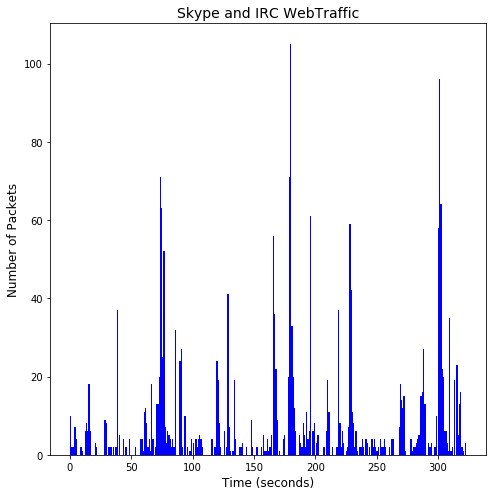

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

# Get list of Time Stamps
timeStamps = []
for line in packets:
    timeStamps.append(float(re.findall(r'\d+\.\d+', line)[0]))

# Specify the bins for each second
bins = np.linspace(0, math.ceil(timeStamps[-1]), math.ceil(timeStamps[-1]))

# Plot the histogram showing web traffic per second
plt.rcParams['figure.figsize'] = [7, 7]
plt.hist(timeStamps, bins, facecolor = 'blue')
plt.title('Skype and IRC WebTraffic', fontsize = 14)
plt.xlabel('Time (seconds)', fontsize = 12)
plt.ylabel('Number of Packets', fontsize = 12)
_ = plt.tight_layout()

### Problem 3: Retrieving Data from the Web
#### Time Spent: 3 hours
#### ([Back to Top](#Table-of-Contents))

In this problem, we'll scrape data from Wikipedia using BeautifulSoup. Documentation for BeauitfulSoup can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. As mentioned in lecture, there is another package, called requests, which is becoming quite popular, which you are welcome to use for this problem instead, if you wish. Documentation for the requests package can be found at http://docs.python-requests.org/en/master/ .

Suppose you are trying to choose a city to vacation in. A major factor in your decision is weather. Conveniently, lots of weather information is present in the Wikipedia articles for most world cities. Your job in this problem is to use `BeautifulSoup` to retrieve weather information from Wikipedia articles. We should note that in practice, such information is typically more easily obtained from, for example, the National Oceanic and Atmospheric Administration (NOAA), in the case of American cities, and from analogous organizations in other countries.
1. Look at a few Wikipedia pages corresponding to cities. For example:
    * https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan
    * https://en.wikipedia.org/wiki/Buenos_Aires
    * https://en.wikipedia.org/wiki/Harbin

Note that most city pages include a table titled something like "Climate data for \[Cityname\] (normals YYYY-YYYY, extremes YYYY-YYYY)" Find a Wikipedia page for a city that includes such a table (such as one of the three above). In your jupyter notebook, open the URL and read the HTML using either `urllib` or `requests`, and parse it with `BeautifulSoup` using the standard parser, `html.parser`. Have a look at the parsed HTML and find the climate data table, which will have the tag `table` and will contain a child tag `th` containing a string similar to

`Climate data for \[Cityname\] (normals YYYY-YYYY, extremes YYYY-YYYY)`. 

Find the node in the `BeautifulSoup` object corresponding to this table. What is the structure of this node of the tree (e.g., how many children does the table have, what are their tags, etc.)? You may want to learn a bit about the structure of HTML tables by looking at the resources available on these websites:
- https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
- https://www.w3schools.com/html/html_tables.asp
- https://www.w3.org/TR/html401/struct/tables.html

In [70]:
from bs4 import BeautifulSoup

response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan')
parsed = BeautifulSoup(response, 'html.parser')
soup = parsed.find('table', {'class': 'wikitable collapsible'})

# Direct Children of tBody
tBodyChildren = [child.name for child in soup.tbody.children if child != '\n']

# All the children of tBody
tBodyTotChildren = [child.name for child in soup.tbody.descendants if child.name != None]

# Number of direct children of tBody
n_tBodyChildren = len(tBodyChildren)

# Total number of children of tBodyTotChildren
n_tBodyTotChildren = len(tBodyTotChildren)

- *A `table` node has only one `tbody` tag. This `tbody` tag has 12 children which represent its table rows. Each table row even more children of their own. In total, the `tbody` tag has 252 total number of children.*

2. Write a function `retrieve_climate_table` that takes as its only argument a Wikipedia URL, and returns the `BeautifulSoup` object corresponding to the climate data table (if it exists in the page) and returns `None` if no such table exists on the page. You should check that the URL is retrieved successfully, and raise an error if `urllib2` fails to successfully read the website. You may notice that some city pages include more than one climate data table or several nested tables (see, for example, https://en.wikipedia.org/wiki/Los_Angeles). In this case, your function may arbitrarily choose one of the tables to return as a `BeautifulSoup` object. **Note:** a good way to check for edge cases is to test your script on the Wikipedia pages for a few of your favorite cities. The pages for Los Angeles, Hyderabad and Boston will give good examples of edge cases that you should be able to handle, but note that these are by no means exhaustive of all the possible edge cases. **Hint:** make use of the `contents` attribute of the `BeautifulSoup` objects and the ability to change the elements of the contents list to Unicode.

In [71]:
import urllib

def retrieve_climate_table(url):
    try:
        response = urllib.request.urlopen(url)
    except:
        raise urllib.error.URLError('Unable to read website!')
    parsed = BeautifulSoup(response, 'html.parser')
    return(parsed.find('table', {'class': 'wikitable collapsible'}))

# s = 'https://en.wikipedia.org/wiki/Los_Angeles'
# parsed = retrieve_climate_table(s)
# parsed

3. As you look at some of the climate data tables, you may notice that different cities' tables contain different information. For example, not all cities include snowfall data. Write a function `list_climate_table_row_names` that takes as its only argument a Wikipedia URL and returns a list of the row names of the climate data table, or returns `None` if no such table exists. The list returned by your function should, ideally, consist solely of Python strings (either Unicode or ASCII), and should not include any `BeautifulSoup` objects or HTML (**Hint:** see the `BeautifulSoup` method `get_text()`). The list returned by your script should *not* include an entry corresponding to the `Climate data for`... row in the table. **Second hint:** you are looking for HTML table header (`th`) objects. The HTML attribute `scope` is your friend here, because in the context of an HTML table it tells you when a `th` tag is the header of a row or a column.

In [72]:
def list_climate_table_row_names(url):
    climateTable = retrieve_climate_table(url)
    tableRows = [line for line in climateTable.find_all('th') if line.get('scope') == 'row']
    rowNames = [row.get_text().replace('\n', '') for row in tableRows]
    return(rowNames)

# url = 'https://en.wikipedia.org/wiki/Los_Angeles'
# list_climate_table_row_names(url)

4. The next natural step would be to write a function that takes a URL and a row name and retrieves the data from that row of the climate data table (if the table exists and has that row name). Doing this would require some complicated string wrangling to get right, so I'll spare you the trouble. Instead, please **briefly** describe either in pseudo code or in plain English how you would accomplish this, using the two functions you wrote above and the tools available to you in the `BeautifulSoup` package. **Note:** just to be clear, you **do not** have to write any code for this last step.

* For each `th` tag that has a row attribute, we can extract the climate data from each `td` tag that follows it. We can use a regular expression to get the temperature stored inside of each `td` tag. 

### Problem 4: Relational Databases and SQL
#### Time Spent: 2 hours
#### ([Back to Top](#Table-of-Contents))
In this problem, you'll interact with a toy SQL database using Python's built-in `sqlite3` package. Documentation can be found at https://docs.python.org/3/library/sqlite3.html . For this problem, we'll use a popular toy SQLite database, called Chinook, which represents a digital music collection. See the documentation at 

https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite 

for a more detailed explanation. We'll use the `.sqlite` file `Chinook_Sqlite.sqlite`, which you should download from the GitHub page above. **Note:** Don't forget to save the file in the directory that you're going to compress and hand in, and make sure that you use a relative path when referring to the file, so that when we try to run your code on our machines the file path will still work! 
1. Load the database using the Python `sqlite3` package. How many tables are in the database? Save the answer in the variable `n_tables`.

In [80]:
import sqlite3

conn = sqlite3.connect('Chinook_Sqlite.sqlite')
c = conn.cursor()

tables = []
for table in c.execute("SELECT name FROM sqlite_master WHERE type = 'table'"):
    tables.append(table)

n_tables = len(tables)
# n_tables

2. What are the names of the tables in the database? Save the answer as a list of strings, `table_names`. **Note:** you should write Python `sqlite3` code to answer this; don't just look up the answer in the documentation!

In [81]:
# SQL query is done in previous problem
table_names = [tup[0] for tup in tables]
# table_names

3. Write a function `list_album_ids_by_letter` that takes as an argument a single character and returns a list of the primary keys of all the albums whose titles start with that character. Your function should ignore case, so that the inputs "a" and "A" yield the same results. Include error checking that raises an error in the event that the input is not a single character.

In [87]:
def list_album_ids_by_letter(char):
    # Perform Error-checking
    if not isinstance(char, str) or len(char) != 1:
        raise ValueError('Should provide a single character!')

    c.execute('SELECT AlbumId FROM Album WHERE Title LIKE "' + char + '%"')
    return([tup[0] for tup in c.fetchall()])

# list_album_ids_by_letter('a')

4. Write a function `list_song_ids_by_album_letter` that takes as an argument a single character and returns a list of the primary keys of all the songs whose album names begin with that letter. Again, your function should ignore case and perform error checking as in `list_album_ids_by_letter`. (again ignoring case). **Hint:** you'll need a JOIN statement here. Don't forget that you can use the `cursor.description` attribute to find out about tables and the names of their columns.

In [76]:
def list_song_ids_by_album_letter(char):
    # Perform Error-checking
    if not isinstance(char, str):
        raise TypeError('Input should be a string!')
    elif len(char) != 1:
        raise ValueError('Input should be a single letter!')
    
    script = 'SELECT TrackId FROM Track JOIN (SELECT AlbumId FROM Album WHERE Title LIKE "' + char + '%") t_album ON t_album.AlbumId = Track.AlbumId' 
    c.execute(script)
    return([tup[0] for tup in c.fetchall()])

# list_song_ids_by_album_letter('A')

5. Write a function `total_cost_by_album_letter` that takes as an argument a single character and returns the cost of buying every song whose album begins with that letter. This cost should be based on the tracks' unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set. Again your function should ignore case and perform appropriate error checking.

In [77]:
def total_cost_by_album_letter(char):
    # Perform Error-checking
    if not isinstance(char, str):
        raise TypeError('Input should be a string!')
    elif len(char) != 1:
        raise ValueError('Input should be a single letter!')
        
    char.upper()
    script = 'SELECT UnitPrice FROM Track JOIN (SELECT AlbumId FROM Album WHERE Title LIKE "' + char + '%") t_album ON t_album.AlbumId = Track.AlbumId' 
    c.execute(script)
    return(sum([tup[0] for tup in c.fetchall()]))

# total_cost_by_album_letter('F')